# 使用梯度上升法求解主成分

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100. , size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100) # 加了一个噪音

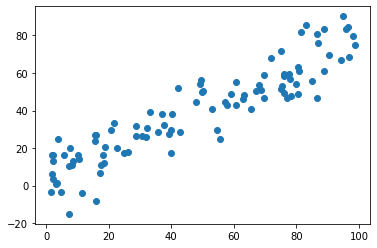

In [37]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## demean

In [38]:
def demean(X): # 【思考】
    return X - np.mean(X, axis=0) # 行向量求均值, 1×n的向量，x中每个样本减去向量，这个向量就是每一个的均值

In [39]:
X_demean = demean(X)

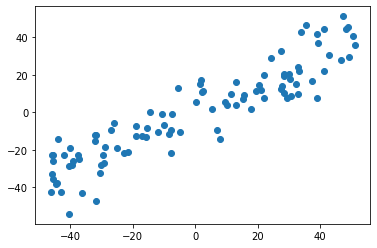

In [40]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [41]:
np.mean(X_demean[:, 0])

-2.1387336346379014e-14

In [42]:
np.mean(X_demean[:, 1])

8.490985692333198e-15

## 梯度上升法

In [43]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X) # X要求是归零化的矩阵

In [44]:
def df_math(w, X): #梯度
    return X.T.dot(X.dot(w)) * 2. / len(X) # 公式

In [45]:
# 测试函数的准确性
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon) # 注意公式 别写错了
    return res

In [46]:
def direction(w):
    return w / np.linalg.norm(w) # 求向量的模，因为结果可能大于1，导致搜索不顺畅，所以梯度上升过程中要使用取模，让它每次成为单位向量

# 梯度上升法
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    
    return w

In [47]:
initial_w = np.random.random(X.shape[1]) # 注意：不能从0向量开始
initial_w

array([0.6841699, 0.1927296])

In [48]:
eta = 0.001

In [49]:
# 注意：不能使用StandardScaler标准化数据，如果标准化了，方差就为1，最大值不存在了。

In [50]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79145288, 0.61123018])

In [51]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.79145288, 0.61123018])

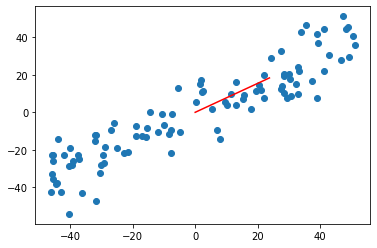

In [52]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

In [55]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100. , size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

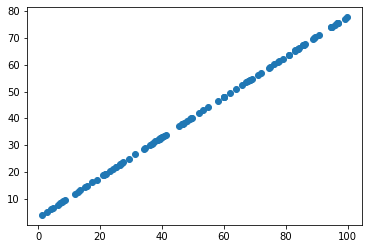

In [56]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [58]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

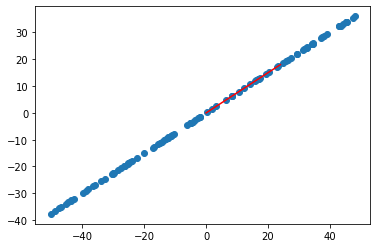

In [63]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 30], [0, w2[1] * 30], color='r')
plt.show()